## Spatial equity

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import cartogram
import netCDF4

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.animation import FuncAnimation


An issue in modelling is the number of regions that exist in the model, and the way difference in living conditions are being taken into account. 

In [30]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact',   
       'witness_tot_eq_witness_total_impact']

In [34]:
ds_path = r'..\..\..\results\batch\run_ds_18_07.nc'
ds = xr.open_dataset(ds_path)

data = ds[variables].to_dataframe().reset_index()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

ds.close()

In [35]:
data.head()

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,witness_tot_eq_witness_total_impact
1,0,2005.0,BELGIUM,455.259577,549.954362,929.247743
2,0,2005.0,BULGARIA,336.570307,406.577517,686.986532
3,0,2005.0,CROATIA,180.593082,218.156758,368.615450
4,0,2005.0,CYPRUS,34.370532,41.519663,70.155008
5,0,2005.0,CZECH REPUBLIC,498.650910,602.371168,1017.815453


In [27]:
map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,WILIAM reg,WILIAM cod,region,FUND code,FUND regio,Country,ISO,geometry
0,889953.0,Oceania,Fiji,FJI,5496,Rest of the world,LROW,LROW,SIS,Small Island States,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,Rest of the world,LROW,LROW,SSA,Sub-Saharan Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,Rest of the world,LROW,LROW,NAF,North Africa,Western Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"United States, Mexico and Canada",USMCA,USMCA,CAN,Canada,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"United States, Mexico and Canada",USMCA,USMCA,USA,USA,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [23]:
vmax

15245773.296675047

Merging data for 2010 and define_tot_eq_define_total_impact
Merging data for 2020 and define_tot_eq_define_total_impact
Merging data for 2030 and define_tot_eq_define_total_impact
Merging data for 2040 and define_tot_eq_define_total_impact
Merging data for 2050 and define_tot_eq_define_total_impact
Merging data for 2010 and dice_tot_eq_dice_total_impact
Merging data for 2020 and dice_tot_eq_dice_total_impact
Merging data for 2030 and dice_tot_eq_dice_total_impact
Merging data for 2040 and dice_tot_eq_dice_total_impact
Merging data for 2050 and dice_tot_eq_dice_total_impact
Merging data for 2010 and witness_tot_eq_witness_total_impact
Merging data for 2020 and witness_tot_eq_witness_total_impact
Merging data for 2030 and witness_tot_eq_witness_total_impact
Merging data for 2040 and witness_tot_eq_witness_total_impact
Merging data for 2050 and witness_tot_eq_witness_total_impact


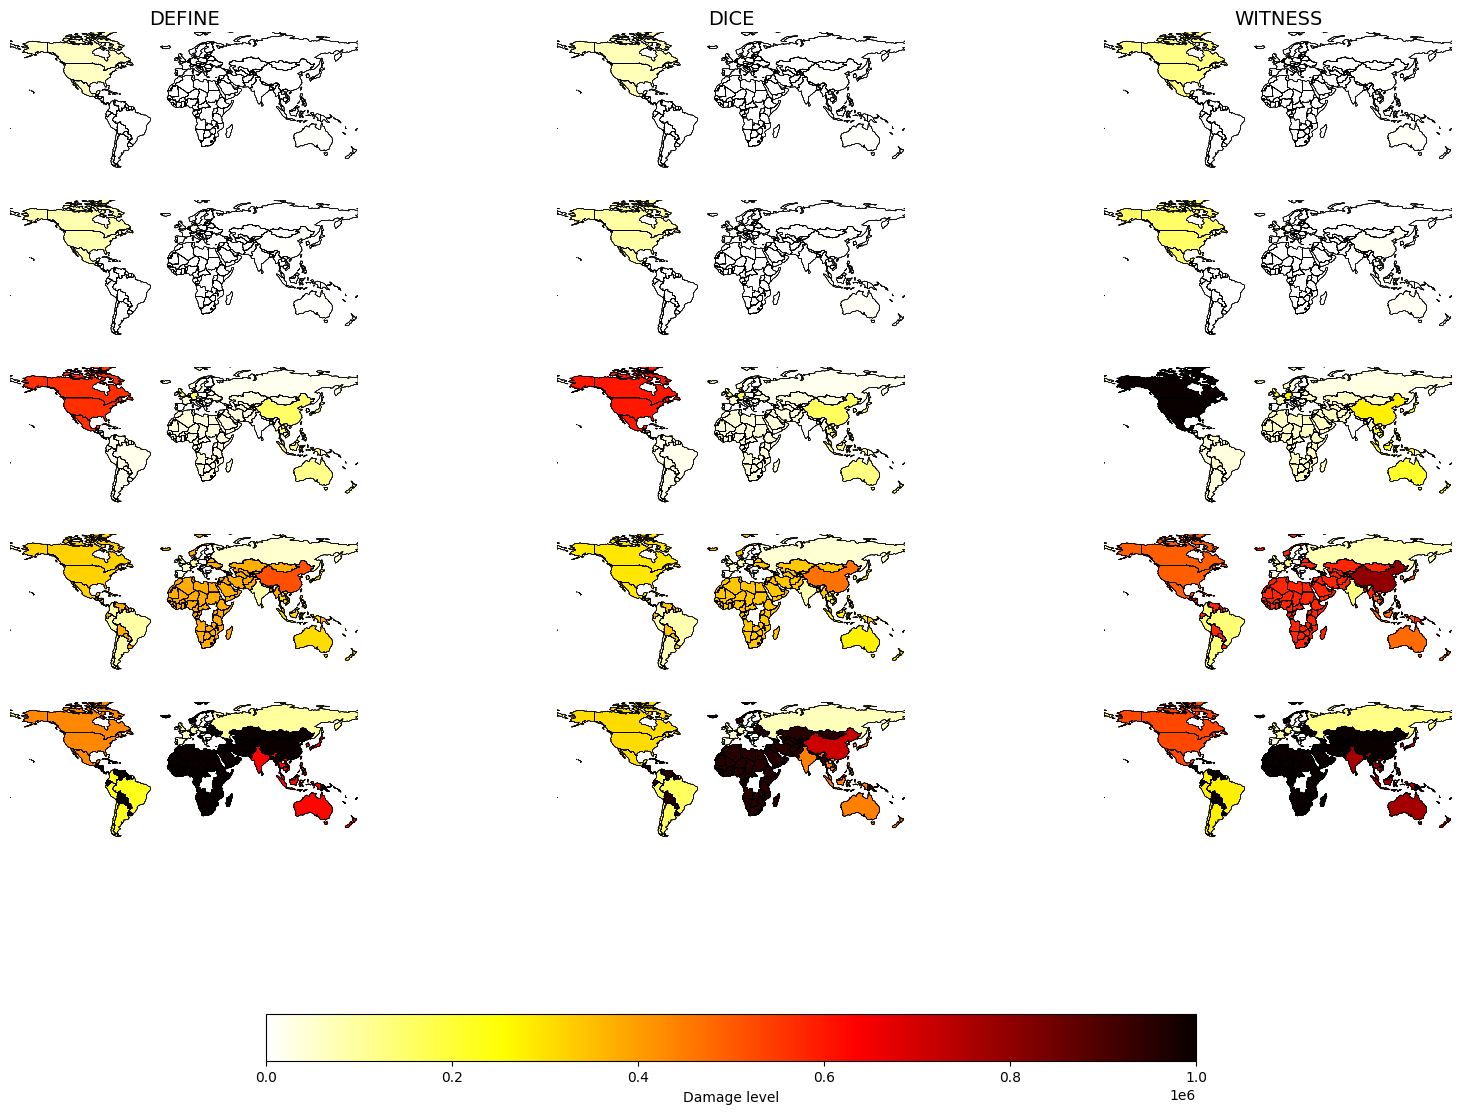

In [49]:
decades = np.arange(2010, 2051, 10)

fig, ax = plt.subplots(len(decades), len(variables), figsize=(20, 15))

map = gpd.read_file(r'../3_modelling\geography\output_countries\countries.shp')

vmin = 0 #data[variables].values.min()
vmax = 1000000 #data[variables].values.max()

column_titles = ['DEFINE', 'DICE', 'WITNESS']

for j, r in enumerate(variables):
    for i, d in enumerate(decades):
        map_variable = map.merge(data[data['time'] == d], left_on='region', right_on='REGIONS 35 I')
        print(f'Merging data for {d} and {r}')

        ax[i, j].set_axis_off()
        ax[i, j].set_xlim(-180, 180)
        ax[i, j].set_ylim(-60, 80)

        map_variable.boundary.plot(ax=ax[i, j], linewidth=0.2, color='black', alpha=0.5)
        map_variable.plot(column=r, ax= ax[i,j], cmap='hot_r', vmin=vmin, vmax=vmax)

        if i == 0:  # Ajouter un titre à la première ligne de chaque colonne
            ax[i, j].set_title(column_titles[j], fontsize=14)

        if j == 0:
            ax[i, j].set_ylabel(f'{d}', fontsize=18, rotation=90)
        
# Créer un objet Normalize pour normaliser les valeurs dans [vmin, vmax] à [0, 1]
norm = Normalize(vmin=vmin, vmax=vmax)

# Créer une ScalarMappable pour mapper les valeurs normalisées à une colormap
sm = ScalarMappable(cmap='hot_r', norm=norm)
sm.set_array([])  # Mettre un tableau vide, les données ne sont pas encore nécessaires

# Ajout d'une colorbar commune pour toutes les sous-graphiques
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.6)
cbar.set_label('Damage level')  # Définir le label de la colorbar

#plt.tight_layout()

#plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)


plt.savefig('../../../../Memoire/results/carte_progressive.png')


In [26]:
for j, r in enumerate(variables):
    for i, d in enumerate(decades):
        map_variable = map.merge(data[data['time'] == d], left_on='region', right_on='region')

        if map_variable.empty:
            print(f"No data for decade {d} and variable {r}")
            continue  # Sauter cette itération si la fusion échoue ou si aucune donnée n'est disponible

No data for decade 2020 and variable define_tot_eq_define_total_impact
No data for decade 2030 and variable define_tot_eq_define_total_impact
No data for decade 2040 and variable define_tot_eq_define_total_impact
No data for decade 2050 and variable define_tot_eq_define_total_impact
No data for decade 2020 and variable dice_tot_eq_dice_total_impact
No data for decade 2030 and variable dice_tot_eq_dice_total_impact
No data for decade 2040 and variable dice_tot_eq_dice_total_impact
No data for decade 2050 and variable dice_tot_eq_dice_total_impact
No data for decade 2020 and variable witness_tot_eq_witness_total_impact
No data for decade 2030 and variable witness_tot_eq_witness_total_impact
No data for decade 2040 and variable witness_tot_eq_witness_total_impact
No data for decade 2050 and variable witness_tot_eq_witness_total_impact
